<a href="https://colab.research.google.com/github/ycuayal-design/Sys2025/blob/main/ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PARTE 1**



In [ ]:
from sympy import *
t, T , n , A= symbols('t T n A')
rect = Heaviside(t + T/4) - Heaviside(t - T/4)
w0= 2*pi/T
x2= cos(n*w0*t)

int1= integrate(A*x2, (t, -T/4, T/4))
an = simplify((2/T)*(int1))
print("Parte real de an:")
an

In [ ]:
cn= simplify((1/2)*(an))
cn

In [ ]:
import sympy as sym
t= symbols('t')
T=4
rect= sym.Heaviside(t+T/4)- sym.Heaviside(t-T/4)
p = sym.plot(rect, (t, -T/2, T/2), ylim=[-0.5, 1.5], ylabel='$x(t)$', xlabel='t', show=False)
p.title = 'Función '
p.show()

**PARTE** **2**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# Definir la variable simbólica
t = sym.symbols('t')

# Parámetros
T = 4
B = 5

# Función definida en [-T/4, T/4] y 0 fuera de ese rango
rampa = sym.Piecewise(
    (B * (t + T/4) / (T/4), sym.And(t >= -T/4, t < 0)),   # Subida
    (B * (T/4 - t) / (T/4), sym.And(t >= 0, t <= T/4)),   # Bajada
    (0, True)  # Cero fuera del intervalo [-T/4, T/4]
)

# Graficar en un intervalo más amplio
p = sym.plot(rampa, (t, -T/2, T/2), ylim=[-0.5, B + 1], ylabel='$x(t)$', xlabel='t', show=False)
p.title = 'Función rampa '
p.show()


In [ ]:
from sympy import symbols, cos, integrate, simplify, Eq, pretty, Piecewise,latex

# Definir símbolos
t, T, B, n, w0 = symbols('t T B n w0', real=True)

# Definir funciones por tramos
x1 = (4*B/T)*t + B
x2 = (-4*B/T)*t + B

# Calcular integrales
int1 = integrate(x1 * cos(n*w0*t), (t, -T/4, 0))
int2 = integrate(x2 * cos(n*w0*t), (t, 0, T/4))


an = simplify((2/T)*(int1 + int2))
an

si $$n=0\ o\ W0=0$$, entonces:
$$
a_n=\frac{B}{\\2}
$$

En cualquier otro caso, es:

$$
a_n= \frac{16B(1-cos(TnW_0))}{\\T^2n^2W_0^2}
$$


In [ ]:
from sympy import simplify

# c_n = Re(C_n) = a_n / 2
cn = simplify(r / 2)
print("Parte real de Cn (c_n):")
cn


si $n=0$ o $W_0=0$,
$$
C_n= \frac{B}{\\4}
$$

en otro caso:
$$
C_n= \frac{8B(1-cos(\frac{TnW_0}{\\4})}{\\T^2n^2W_0^2}
$$

/tmp/ipython-input-3089968733.py:31: RuntimeWarning: divide by zero encountered in divide
  Cn = ((A)/(nv*np.pi))*(np.sin(nv*(np.pi/2)))
/tmp/ipython-input-3089968733.py:31: RuntimeWarning: invalid value encountered in multiply
  Cn = ((A)/(nv*np.pi))*(np.sin(nv*(np.pi/2)))


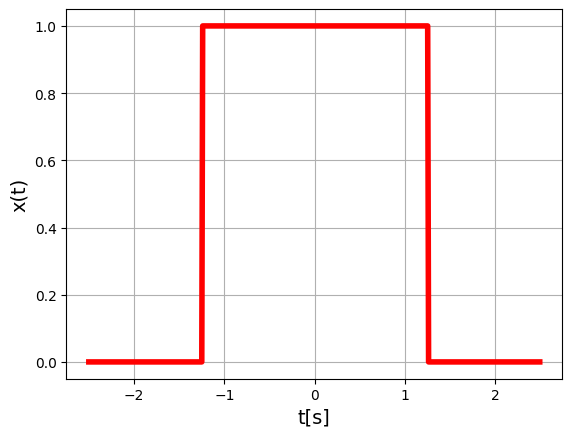

interactive(children=(IntSlider(value=0, description='n', max=20), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_base(n)>

In [1]:
#Este código realiza la reconstrucción de una señal rectangular utilizando la Serie de Fourier.

from matplotlib import animation, rc
from IPython.display import HTML
from ipywidgets import interact,IntSlider
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings

A = 1 # amplitud de la señal
T = 5 # segundos de gráfica
Fs = 100 # frecuencia de muestreo definida
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas
N = 10 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental

# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex128)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv) #base de fourier en el intervalo de interés

#Definir la señal (xo) como un pulso rectangular centrada en t=0, con activación en -tau/4 y desactivado en tau/4
tau = T
xo = A * (np.heaviside(tv + tau/4, 0) - np.heaviside(tv - tau/4, 0))

#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex128)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = ((A)/(nv*np.pi))*(np.sin(nv*(np.pi/2)))
Cn[N] = A/2 # nivel dc C_0

#graficar señal original
plt.plot(tv,xo,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()


# Función para graficar una base específica
def plot_base(n):
    plt.clf()  # Limpia la figura actual
    base = phin[:, n]  # Obtiene la base correspondiente al índice n

    plt.plot(tv, np.real(base)) #label=f"Re(base {n})")
    plt.plot(tv, np.imag(base)) #label=f"Im(base {n})")
    plt.plot(tv, xo, 'r', linewidth=2) #label="Pulso rectangular")

    plt.title(f"Base de Fourier {n}")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.legend()
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.grid(True)
    plt.show()

# Crea un control deslizante para seleccionar la base
interact(plot_base, n=IntSlider(min=0, max=phin.shape[1]-1, step=1, value=0))